[**Demo %s**](#demo-upwind-directionb)

If instead of $u(1,t)=0$ we were to try to impose the downwind condition $u(0,t)=0$, we only need to change the index of the interior nodes and where to append the zero value.

In [13]:
chop = @(u) u(2:m+1);  
extend = @(v) [0; v];
ivp.ODEFcn = @(t, v) -c * chop( Dx * extend(v) );
ivp.InitialValue = chop(u_init);
sol = solutionFcn(ivp, 0, 1);
u = @(t) [zeros(1, length(t)); sol(t)];

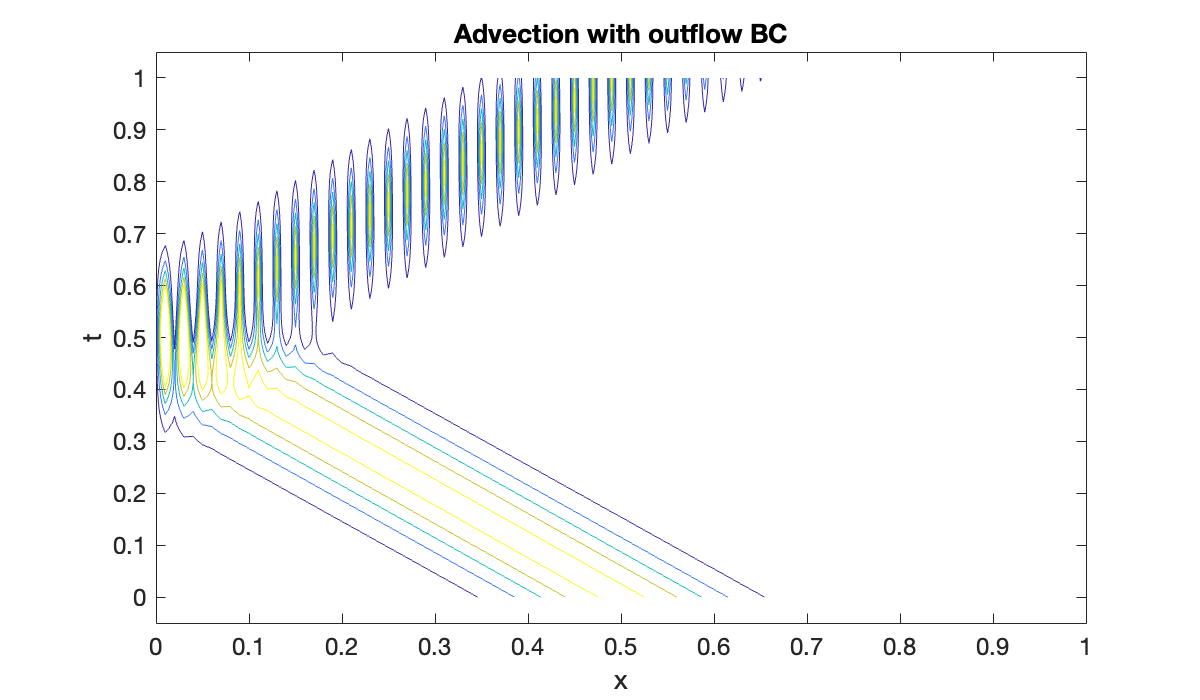

In [14]:
contour(x, t, u(t)', 0.15:0.2:1)
xlabel x,  ylabel t
title('Advection with outflow BC')

This time, the solution blows up as soon as the hump runs into the boundary because there are conflicting demands there.

In [15]:
clf
plot(x, u(0))
hold on
axis([0, 1, -0.05, 1.05])
title('Advection with outflow BC') 
xlabel('x'),  ylabel('u(x,t)')
vid = VideoWriter("advection-outflow.mp4", "MPEG-4");
vid.Quality = 85;
open(vid);
for frame = 1:45
    cla, plot(x, u(t(frame)))
    str = sprintf("t = %.2f", t(frame));
    text(0.08, 0.85, str);
    writeVideo(vid, frame2im(getframe(gcf)));
end
close(vid)
close(gcf)